# Polynomial Regression

### Implementation from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

In [2]:
dataset= pd.read_excel('Youtube Income data.xlsx')
dataset.head(10)

,watch hours,Earning
0,17104,2.149453e+05
1,24387,4.172079e+05
2,42659,1.378506e+06
3,10002,6.438296e+04
4,81500,4.668859e+06
5,57934,2.358270e+06
6,65655,3.796217e+06
7,79237,4.413135e+06
8,12771,1.037248e+05
9,28154,5.263630e+05


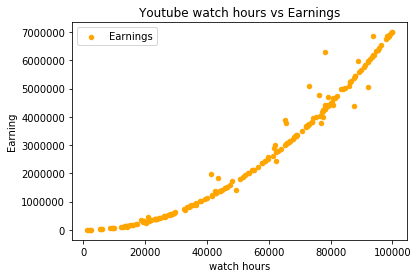

In [3]:
dataset.plot(x='watch hours',y='Earning',kind='scatter',color='orange',
            title='Youtube watch hours vs Earnings',label='Earnings')

In [4]:
dataset.isnull().sum(axis=0)

watch hours    0
Earning        0
dtype: int64

In [40]:
independent_var=dataset.iloc[:,0].values
dependent_var=dataset.iloc[:,1].values

In [41]:
class Scaler:
    def __init__(self):
        self.min=None
        self.max=None
    def scale(self,data):
        if self.min is None and self.max is None:
            self.min=data.min(axis=0)
            self.max=data.max(axis=0)
        return (data-self.min) / (self.max-self.min)

    def reverse_scaling(self,data):
        return (data*(self.max-self.min))+self.min

In [42]:
xscaler=Scaler();yscaler=Scaler();
x=xscaler.scale(independent_var);y=yscaler.scale(dependent_var)

In [43]:
def splitter(x,y,train_size=0.75,seed=None):
    np.random.seed(seed)
    data=np.concatenate([x.reshape(-1,1),y.reshape(-1,1)],axis=1)
    np.random.shuffle(data)
    xtrain=data[:int(len(data)*train_size),:-1]
    ytrain=data[:int(len(data)*train_size),-1]
    xtest=data[int(len(data)*train_size):,:-1]
    ytest=data[int(len(data)*train_size):,-1]
    return xtrain,ytrain,xtest,ytest

In [44]:
xtrain,ytrain,xtest,ytest=splitter(x,y,train_size=0.85,seed=101)

In [45]:
def transform_degree(data,degree=2):
    if data.shape[1] is 1:
        return np.append(data,data**degree,axis=1)

In [46]:
def matrix_method(x,y):
    ones=np.ones(shape=len(x)).reshape(-1,1)
    x_=np.empty(shape=(len(x),len(x[0])+1))
    x_[:,0]=ones.flatten()
    x_[:,1:]=x.copy()
    x_t=x_.T
    y_=y.reshape(-1,1).copy()
    covar_x=np.dot(x_t,x_)
    covar_xy=np.dot(x_t,y_)
    b=(np.linalg.inv(covar_x))@covar_xy
    return b

In [54]:
def predict(x,coeff):
    x_1=np.concatenate([np.ones(shape=(len(x),1)),x],axis=1)
    return (x_1@coeff).flatten()

def make_predictions_from_user():
    x=float(input("Enter the value for Watch Hour : "))
    x=np.array(x).reshape(-1,1)
    print("""!!! MAKING PREDICTIONS!!!""")
    print("The predicted Earnings for given watch hour {}  is : {} "
          .format(x,yscaler.reverse_scaling(predict(transform_degree(xscaler.scale(x)),coeff))))

In [48]:
coeff=matrix_method(transform_degree(xtrain,degree=2),ytrain)
print("Weights : ",coeff.flatten()[1:])
print("Bias : ",coeff.flatten()[0])

Weights :  [0.0841 0.9191]
Bias :  -0.007421545436773869


In [49]:
ypred=yscaler.reverse_scaling(predict(transform_degree(xtest,degree=2),coeff)).flatten()
ytrue=yscaler.reverse_scaling(ytest).flatten()
print("Predictions :",ypred)

Predictions : [5605367.9811 4439132.8292 6808543.7004 3317371.5558  267097.6063
  254423.6539 4462997.7162 1418176.4253 1639357.2669 4293502.7493
 6184059.6232 5041741.564  4201929.9355 6866197.605  1425211.4365
 2413545.2533 3904974.3881 1436173.8422 3385928.6689 5779647.2423
 3872299.6412 3792872.7714 4210127.4171   90193.9365 2408438.5154
  -14717.6313 1564010.7836  634313.6719 6155504.4556 6308034.1057]


In [50]:
def mse(true,pred):
    return np.mean((pred-true)**2)

def rmse(true,pred):
    return mse(true,pred)**0.5

def mae(true,pred):
    return np.mean(abs(pred-true))

def r_squared(true,pred):
    true_mean=true.mean()
    pred_mean=pred.mean()
    tot=((true-true_mean)**2).sum(axis=0)
    obs=((true-pred)**2).sum(axis=0)
    return 1-(obs/tot)

In [51]:
poly_reg_srh_mse=mse(ytrue,ypred)
print("MSE : {}".format(poly_reg_srh_mse))
poly_reg_srh_rmse=rmse(ytrue,ypred)
print("RMSE : {}".format(poly_reg_srh_rmse))
poly_reg_srh_mae=mae(ytrue,ypred)
print("MAE : {}".format(poly_reg_srh_mae))
poly_reg_srh_r2=r_squared(ytrue,ypred)
print("R_squared : {}".format(poly_reg_srh_r2))

MSE : 83159828354.18741
RMSE : 288374.45856765367
MAE : 120937.39310542845
R_squared : 0.982597782306786


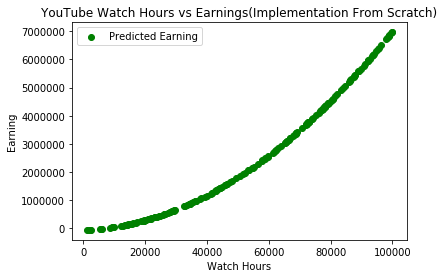

In [52]:
plt.scatter(xscaler.reverse_scaling(x),
            yscaler.reverse_scaling(predict(transform_degree(x.reshape(-1,1),degree=2),coeff)).flatten(),
          color='green',label='Predicted Earning')
plt.title('YouTube Watch Hours vs Earnings(Implementation From Scratch)')
plt.xlabel('Watch Hours')
plt.ylabel('Earning')
plt.legend()
plt.show()

In [55]:
make_predictions_from_user()

Enter the value for Watch Hour : 72231
!!! MAKING PREDICTIONS!!!
The predicted Earnings for given watch hour [[72231.]]  is : [3708649.177] 


### Scikit Learn Implementation

In [19]:
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split 

In [20]:
pf=PolynomialFeatures(degree=2,include_bias=False)
xscaler=MinMaxScaler()
yscaler=MinMaxScaler()
x=xscaler.fit_transform(independent_var.reshape(-1,1))
y=yscaler.fit_transform(dependent_var.reshape(-1,1))

c:\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
poly_reg=LinearRegression()
poly_reg.fit(pf.fit_transform(xtrain),ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
print("Coefficients :",poly_reg.coef_)

Coefficients : [[0.0793 0.9276]]


In [25]:
print("Bias : ",poly_reg.intercept_)

Bias :  [-0.0068]


In [26]:
ypred=yscaler.inverse_transform(poly_reg.predict(pf.fit_transform(xtest))).flatten()
ytrue=yscaler.inverse_transform(ytest.reshape(-1,1)).flatten()
print("Predictions from Test Set :",ypred)

Predictions from Test Set : [ 3.7192e+06  6.0834e+05  5.4676e+06  5.9789e+06  1.3466e+06  4.9385e+06
  3.1621e+06  1.0733e+06  6.7735e+06  6.9626e+06  8.9739e+05  1.5381e+06
  2.8387e+05  5.8640e+05  1.3928e+06  5.5668e+05  4.5822e+06  1.8553e+06
  7.8492e+05  1.2748e+06  3.5402e+05  1.8031e+05  3.9166e+06 -6.3470e+03
  2.7885e+05  3.7712e+06  4.3073e+06  1.0484e+05  6.8374e+06  4.0452e+06]


In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [28]:
poly_reg_sci_mse=mean_squared_error(ytrue,ypred)
print("MSE : {}".format(poly_reg_sci_mse))
poly_reg_sci_rmse=poly_reg_sci_mse**0.5
print("RMSE : {}".format(poly_reg_sci_rmse))
poly_reg_sci_mae=mean_absolute_error(ytrue,ypred)
print("MAE : {}".format(poly_reg_sci_mae))
poly_reg_sci_r2=r2_score(ytrue,ypred)
print("R2 Score : {}".format(poly_reg_sci_r2))

MSE : 7745530841.309606
RMSE : 88008.69753217352
MAE : 48406.70387431924
R2 Score : 0.9985022205032619


c:\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


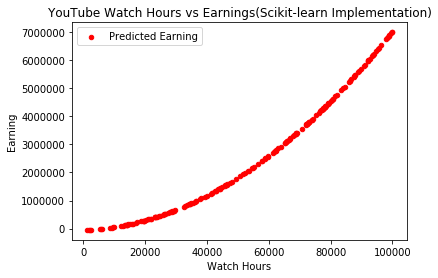

In [29]:
plt.scatter(independent_var,
            yscaler.inverse_transform(
                poly_reg.predict(pf.fit_transform(xscaler.fit_transform(independent_var.reshape(-1,1))))).flatten(),
            s=20,color='red',label='Predicted Earning')
plt.title('YouTube Watch Hours vs Earnings(Scikit-learn Implementation)')
plt.xlabel('Watch Hours')
plt.ylabel('Earning')
plt.legend()
plt.show()

In [30]:
print("Predicted Earnings for watch hour of {} is {}"
     .format(xscaler.inverse_transform(xtest[0].reshape(-1,1)),ypred[0]))

Predicted Earnings for watch hour of [[72231.]] is 3719245.512360765


### LINEAR REGRESSION

In [31]:
lin_reg=LinearRegression()
lin_reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
print("Weight : ",lin_reg.coef_)

Weight :  [[1.0366]]


In [33]:
print("Bias : ",lin_reg.intercept_)

Bias :  [-0.1782]


In [34]:
ypred=yscaler.inverse_transform(lin_reg.predict(xtest)).flatten()
ytrue=yscaler.inverse_transform(ytest.reshape(-1,1)).flatten()
print("Predictions :",ypred)

Predictions : [3976393.7732  769841.8106 5134914.6716 5437579.3609 1818784.836
 4806622.8991 3552295.003  1473113.7772 5883475.88   5985689.6486
 1228036.384  2041328.0699  111711.8037  731327.5448 1873794.6956
  678085.0702 4575610.9452 2382212.4608 1059324.7531 1731593.8404
  274163.9459 -162306.5196 4119036.4747 -900042.4947   99487.3905
 4014318.9107 4391287.413  -402302.6808 5918160.8116 4210056.8047]


In [35]:
lin_reg_sci_mse=mean_squared_error(ytrue,ypred)
print("MSE : {}".format(lin_reg_sci_mse))
lin_reg_sci_rmse=lin_reg_sci_mse**0.5
print("RMSE : {}".format(lin_reg_sci_rmse))
lin_reg_sci_mae=mean_absolute_error(ytrue,ypred)
print("MAE : {}".format(lin_reg_sci_mae))
lin_reg_sci_r2=r2_score(ytrue,ypred)
print("R2 Score : {}".format(lin_reg_sci_r2))

MSE : 220658635178.78406
RMSE : 469743.15873547754
MAE : 383578.5187225302
R2 Score : 0.9573304933747949


c:\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


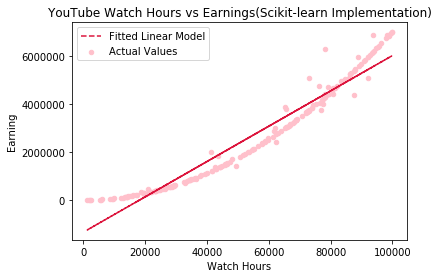

In [36]:
plt.scatter(independent_var,dependent_var,
            s=20,color='pink',label='Actual Values')
plt.plot(independent_var,
         yscaler.inverse_transform(lin_reg.predict(xscaler.fit_transform(independent_var.reshape(-1,1)))),'--',
        color='crimson',label='Fitted Linear Model')
plt.title('YouTube Watch Hours vs Earnings(Scikit-learn Implementation)')
plt.xlabel('Watch Hours')
plt.ylabel('Earning')
plt.legend()
plt.show()

In [37]:
print("Predicted Earnings for watch hour of {} is {}"
     .format(xscaler.inverse_transform(xtest[0].reshape(-1,1)),ypred[0]))

Predicted Earnings for watch hour of [[72231.]] is 3976393.773225333


### Compairision of metrics of models

In [38]:
models=['poly_reg(scratch)','poly_reg(scikit)','Linreg']
r2_score={'poly_reg(scratch)':poly_reg_srh_r2,'poly_reg(scikit)':poly_reg_sci_r2,'LinReg':lin_reg_sci_r2}
rmse={'poly_reg(scratch)':poly_reg_srh_rmse,'poly_reg(scikit)':poly_reg_sci_rmse,'LinReg':lin_reg_sci_rmse}
mse={'poly_reg(scratch)':poly_reg_srh_mse,'poly_reg(scikit)':poly_reg_sci_mse,'LinReg':lin_reg_sci_mse}
mae={'poly_reg(scratch)':poly_reg_srh_mae,'poly_reg(scikit)':poly_reg_sci_mae,'LinReg':lin_reg_sci_mae}

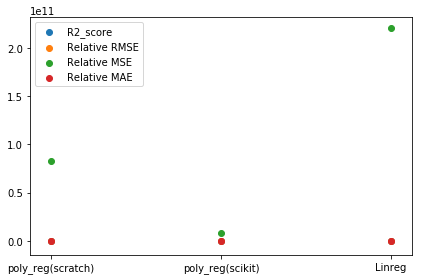

In [39]:
plt.scatter(models,r2_score.values(),label='R2_score')
plt.scatter(models,rmse.values(),label='Relative RMSE')
plt.scatter(models,mse.values(),label='Relative MSE')
plt.scatter(models,mae.values(),label='Relative MAE')
plt.legend()
plt.tight_layout()
plt.show()